In [82]:
import pandas as pd #pd is the alias
import numpy as np 
import datetime
from os import listdir 
from os.path import isfile, join
import glob 
import re
import plotly.graph_objects as go
import matplotlib.pyplot as plt # Use for plotting. "plt" is an alias for calling matplotlib.pyplot
from matplotlib import style # to set the grid style 
import matplotlib.animation as animation
%matplotlib inline

In [83]:
df = pd.read_csv("CleanFile_batch_inforamtion.csv")
df

,Unnamed: 0,Time,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,suggestions for improving program,Would you like to recommend this course to others ?.1
0,0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN,NaN
1,1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,NaN
2,2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN,NaN
3,3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,NaN
4,4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
160,160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN,No
161,161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No,Yes
162,162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.,Yes
163,163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN,Yes


In [3]:
df.shape

(165, 12)

In [4]:
#missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 12 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Unnamed: 0                                             165 non-null    int64  
 1   Timestamp                                              163 non-null    object 
 2   Email                                                  163 non-null    object 
 3   Name                                                   163 non-null    object 
 4   RateUderstandingTopic(0-5)                             163 non-null    float64
 5   TrainingRating(0-5)                                    163 non-null    float64
 6   queries_sloved(0-5)                                    163 non-null    float64
 7   join full time courses?                                163 non-null    object 
 8   Recommend_course                                  

In [5]:
df.isna().sum()

Unnamed: 0                                                0
Timestamp                                                 2
Email                                                     2
Name                                                      2
RateUderstandingTopic(0-5)                                2
TrainingRating(0-5)                                       2
queries_sloved(0-5)                                       2
join full time courses?                                   2
Recommend_course                                         98
want to apply paid intership?                             2
suggestions for improving program                        88
Would you like to recommend this course to others ?.1    69
dtype: int64

In [10]:
df.columns

Index(['Timestamp', 'Email', 'Name', 'RateUderstandingTopic(0-5)',
       'TrainingRating(0-5)', 'queries_sloved(0-5)', 'join full time courses?',
       'Recommend_course', 'want to apply paid intership?',
       'suggestions for improving program',
       'Would you like to recommend this course to others ?.1'],
      dtype='object')

In [11]:
df

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,suggestions for improving program,Would you like to recommend this course to others ?.1
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,NaN
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,NaN
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN,No
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No,Yes
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.,Yes
163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN,Yes


In [13]:
#dropping the row which has all nan value
df1 = df.dropna(how = 'all')
df1

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,suggestions for improving program,Would you like to recommend this course to others ?.1
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO,NaN
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well,NaN
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN,No
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No,Yes
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.,Yes
163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN,Yes


In [14]:
df1.isna().sum()

Timestamp                                                 0
Email                                                     0
Name                                                      0
RateUderstandingTopic(0-5)                                0
TrainingRating(0-5)                                       0
queries_sloved(0-5)                                       0
join full time courses?                                   0
Recommend_course                                         96
want to apply paid intership?                             0
suggestions for improving program                        86
Would you like to recommend this course to others ?.1    67
dtype: int64

In [18]:
df2=df1.drop(['Would you like to recommend this course to others ?.1',], axis = 1)
df2

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,suggestions for improving program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
...,...,...,...,...,...,...,...,...,...,...
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.
163,8/28/2020 21:19:05,titutitasdey@gmail.com,Titas Dey,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN


# Do text classification and create a wordcloud visualization on the batch_information dataset’s suggestion row [ your suggestion for improving the training program] 

In [19]:
df2[df2['suggestions for improving program'].isnull()]

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,suggestions for improving program
0,8/1/20 23:05,deepanjan325@gmail.com,Deepanjan Biswas,5.0,5.0,5.0,Yes,Yes,Yes,NaN
2,8/1/20 23:08,sharmisthaad@gmail.com,Sharmistha Adhikari,1.0,1.0,1.0,Maybe,Yes,Maybe,NaN
5,8/1/20 23:10,as1973240@gmail.com,Abhishek Singh,3.0,3.0,3.0,Maybe,Maybe,Maybe,NaN
16,8/1/20 23:30,debrupc3@gmail.com,DEBRUP CHATTERJEE,4.0,5.0,5.0,Maybe,Yes,Maybe,NaN
17,8/1/20 23:37,debapriya.sarkar.187@gmail.com,Debapriya Sarkar,5.0,5.0,5.0,No,Yes,No,NaN
...,...,...,...,...,...,...,...,...,...,...
155,8/27/2020 22:59:52,sarbanithakur2019@gmail.com,Sarbani Thakur,4.0,4.0,4.0,No,NaN,No,NaN
156,8/27/2020 23:32:53,24sohamb@gmail.com,Soham Banerjee,4.0,4.0,4.0,Maybe,NaN,Maybe,NaN
159,8/28/2020 8:22:27,sonalisarenmumpi@gmail.com,SONALI SAREN,5.0,5.0,5.0,Maybe,NaN,Maybe,NaN
160,8/28/2020 12:15:37,souravkr2025@gmail.com,Sourav Kumar Dan,3.0,4.0,4.0,Yes,NaN,No,NaN


In [21]:
df3 = df2.dropna(subset=['suggestions for improving program'])
df3

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,suggestions for improving program
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
...,...,...,...,...,...,...,...,...,...,...
157,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...
158,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.


In [41]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
df3.rename(columns={"suggestions for improving program": "Improving_sugesstion"},inplace=True)
df3.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,Imroving_sugesstion
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...


In [53]:
#start with one review
text = df3.Imroving_sugesstion[4]
print(text)

I want to know if you r going to tell us how to create app like shankha da present after session


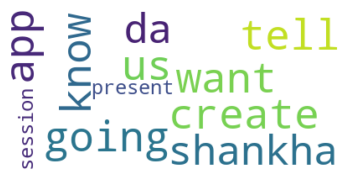

In [54]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


One review file wordcloud has showed.

In [55]:
# Save the image:
wordcloud.to_file("first_review.png")

In [57]:
text = " ".join(suggestions for suggestions in df3.Imroving_sugesstion)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 6444 words in the combination of all review.


In [58]:
text

'NO All is well I want to know if you r going to tell us how to create app like shankha da present after session No suggestions. I just want to know that we can build our own app like shankha da present us after session on a dam project on a synthetic data set The free boot camp was really great. Whatever lessons on R was given was really helpful. Thank you This bootcamp was amazing, faculties are so friendly & well behaved, according to me there is no need of improving the training program,this was at its best  As per my suggestion, the way you guys are approaching is really good and I am quite sure you will carry on this quality of training in future. Al the best. Everything was smooth So far its good. After all its a very great and very helpful session for me....Mainly as a friendly teaching process....Thanking you Surya Da(Rittik Da,Sankhadeep Da,Rishikesh Da)... It\'s very good, but I think if I had prior knowledge on coding then it would be more easy to understand This is complet

In [60]:
# Create stopword list:
stopwords = set(STOPWORDS)
print(stopwords)

{'be', 'under', 'it', 'between', 'both', 'http', 'up', 'why', 'over', "doesn't", 'himself', 'few', 'if', 'else', "she'll", 'themselves', 'against', 'there', "who's", "they're", 'out', 'no', 'too', "he's", 'of', 'then', "shouldn't", 'their', "i'd", "she'd", 'where', "haven't", "he'll", 'its', 'ought', 'from', 'only', 'ourselves', "i'm", "i've", 'during', 'once', 'very', 'for', 'again', 'the', 'how', 'have', 'her', 'other', "he'd", "we'd", 'hers', 'i', 'k', "we'll", 'are', "that's", "mustn't", "aren't", 'would', 'in', "they'd", 'should', "it's", 'those', 'my', 'here', "we've", "here's", 'been', 'into', 'yourselves', 'she', 'below', "they'll", 'through', 'ever', 'he', 'was', "why's", 'but', "we're", 'by', 'cannot', 'than', 'what', 'more', "wasn't", 'further', 'when', 'can', 'before', "didn't", "hasn't", 'just', 'about', 'like', 'therefore', 'until', 'do', 'itself', 'otherwise', "you've", 'or', "when's", 'same', 'while', "you're", 'being', 'myself', 'any', 'also', 'his', 'am', 'however', '

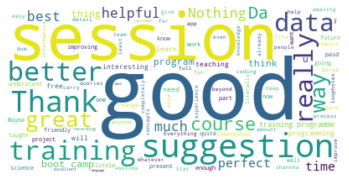

In [62]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud visualization on the batch_information dataset’s suggestion row

# Based on the ratings give a conclusion how good our course was. [ use How well you guys are understanding the covered topics, rate our way of training and how well your queries are getting solved column] [from the batch information dataset]

In [63]:
df3

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,Imroving_sugesstion
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
...,...,...,...,...,...,...,...,...,...,...
157,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...
158,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.


In [64]:
df3.isna().sum()

Timestamp                         0
Email                             0
Name                              0
RateUderstandingTopic(0-5)        0
TrainingRating(0-5)               0
queries_sloved(0-5)               0
join full time courses?           0
Recommend_course                 35
want to apply paid intership?     0
Imroving_sugesstion               0
dtype: int64

In [66]:
# removing nan value from rows   
df4 = df3.dropna(how = 'all')
df4

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,Imroving_sugesstion
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
...,...,...,...,...,...,...,...,...,...,...
157,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...
158,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.


In [67]:
df4.isna().sum()

Timestamp                         0
Email                             0
Name                              0
RateUderstandingTopic(0-5)        0
TrainingRating(0-5)               0
queries_sloved(0-5)               0
join full time courses?           0
Recommend_course                 35
want to apply paid intership?     0
Imroving_sugesstion               0
dtype: int64

In [77]:
Understand_topic = df4.groupby('RateUderstandingTopic(0-5)')['RateUderstandingTopic(0-5)'].agg('count')
df5= pd.DataFrame(Understand_topic)
df5.rename(columns={"RateUderstandingTopic(0-5)": "Ratecounts"},inplace=True)
df5

,Ratecounts
RateUderstandingTopic(0-5),
1.0,1
3.0,4
4.0,26
5.0,46


In [78]:
df5.reset_index(inplace=True)
df5

,RateUderstandingTopic(0-5),Ratecounts
0,1.0,1
1,3.0,4
2,4.0,26
3,5.0,46


In [91]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [92]:
def draw_trace_bar_course(data,data_index, feature, title, xlab, ylab,color='Blue'):
    '''
    this is the function created using plotly for draw a trace bar where
    data is main dataframe
    data index is x label values
    feature is y label values
    '''
    data = data.sort_values(feature, ascending=False)
    trace = go.Bar(
            x = data[data_index],
            y = data[feature],
            marker=dict(color=color),
            text=data[data_index]
        )
    data = [trace]

    layout = dict(title = title,
              xaxis = dict(title = xlab, showticklabels=True, tickangle=45, 
                           zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                           showline=True, linewidth=2, linecolor='black', mirror=True,
                          tickfont=dict(
                            size=12,
                            color='red'),), 
              yaxis = dict(title = ylab, gridcolor='lightgrey', zeroline=True, zerolinewidth=1, zerolinecolor='grey',
                          showline=True, linewidth=2, linecolor='black', mirror=True),
              plot_bgcolor = 'rgba(0, 0, 0, 0)', paper_bgcolor = 'rgba(0, 0, 0, 0)',
              hovermode = 'closest'
             )
    fig = dict(data = data, layout = layout)
    iplot(fig, filename='draw_trace')

In [93]:
draw_trace_bar_course(df5,'RateUderstandingTopic(0-5)','Ratecounts','How Well Students understands the program topic based on their ratings', 'Rating From(1-5)','Total counts based on Rating',"Blue")

from the above bar graph we can see that 90% of  them gave 5 points rating. some of them gave 4 points. only few gave 1 points.So we can say that most of them understood the course very well.

# rate our way of training

In [98]:
#training ratting columns group by for total counts 
df6 = df4.groupby('TrainingRating(0-5)')['TrainingRating(0-5)'].agg('count')
TrainingRating= pd.DataFrame(df6)
TrainingRating.rename(columns={"TrainingRating(0-5)": "Trainingcounts"},inplace=True)
TrainingRating.reset_index(inplace=True)
TrainingRating

,TrainingRating(0-5),Trainingcounts
0,1.0,1
1,2.0,2
2,3.0,1
3,4.0,18
4,5.0,55


In [99]:
draw_trace_bar_course(TrainingRating,'TrainingRating(0-5)','Trainingcounts',' Students Rate our way of training', 'Rating From(1-5)','Total counts based on Rating',"lightgreen")

From the above chart it is clear that most of the students understands our way of training.

# how well your queries are getting solved column

In [101]:
#queries ratting columns group by for total counts 
df7 = df4.groupby('queries_sloved(0-5)')['queries_sloved(0-5)'].agg('count')
Q_solving_Rating= pd.DataFrame(df7)
Q_solving_Rating.rename(columns={"queries_sloved(0-5)": "queriescounts"},inplace=True)
Q_solving_Rating.reset_index(inplace=True)
Q_solving_Rating

,queries_sloved(0-5),queriescounts
0,1.0,1
1,2.0,1
2,3.0,2
3,4.0,13
4,5.0,60


In [103]:
draw_trace_bar_course(Q_solving_Rating,'queries_sloved(0-5)','queriescounts',' Students Rate solving queries', 'Rating From(1-5)','Total counts based on Rating',"green")

from this graph we can see thet most of them gave 5 points rating to our queries solving way.After all of this data we can say our way of training is quite satisfying.

# Find out how many people are interested in applying for the paid internship and alsofind if there any correlation between their positive reply in applying for internship andcourse quality [ use how well they understand the topics column for course quality]

In [104]:
df4

,Timestamp,Email,Name,RateUderstandingTopic(0-5),TrainingRating(0-5),queries_sloved(0-5),join full time courses?,Recommend_course,want to apply paid intership?,Imroving_sugesstion
1,8/1/20 23:06,ranubanerjee1984@gmail.com,RANU BANERJEE,5.0,5.0,5.0,Maybe,Yes,Maybe,NO
3,8/1/20 23:10,saikat20171@gmail.com,Saikat Mitra,4.0,5.0,5.0,Maybe,Yes,Yes,All is well
4,8/1/20 23:10,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I want to know if you r going to tell us how t...
6,8/1/20 23:12,pritamsaha075@gmail.com,Pritam Saha,5.0,5.0,5.0,Maybe,Yes,Yes,No suggestions.
7,8/1/20 23:12,rahulroystat36@gmail.com,Rahul Roy,5.0,5.0,5.0,Yes,Yes,Yes,I just want to know that we can build our own ...
...,...,...,...,...,...,...,...,...,...,...
157,8/27/2020 23:36:00,sohamsengupta44@gmail.com,Soham Sen Gupta,5.0,5.0,5.0,Maybe,NaN,Maybe,I think it is completely ok. Very Very intere...
158,8/27/2020 23:55:56,sohinip815@gmail.com,Sohini Pal,3.0,4.0,4.0,Maybe,NaN,No,Increase the workshop day..so that it covers u...
161,8/28/2020 20:45:00,srijani.adhikary13@gmail.com,Srijani Adhikary,5.0,5.0,5.0,Maybe,NaN,Maybe,No
162,8/28/2020 20:45:07,suvargha2000@gmail.com,Suvargha Ghosh Dastidar,4.0,5.0,5.0,Maybe,NaN,Maybe,The training programme was quite good.


In [105]:
df8 = df4.groupby('want to apply paid intership?')['want to apply paid intership?'].agg('count')
internship= pd.DataFrame(df8)
internship.rename(columns={"want to apply paid intership?": "counts"},inplace=True)
internship.reset_index(inplace=True)
internship

,want to apply paid intership?,counts
0,Maybe,39
1,No,11
2,Yes,27


In [106]:
draw_trace_bar_course(internship,'want to apply paid intership?','counts',' Students interest for paid internship', 'Rating From(1-5)','Total counts',"blue")

from the above chart 39 students are in confusion. they answered 'may be(39)'. And 27 students are willing to attend the internship. & 11 are unwilling to apply for paid internship.